**Project Title:** Sentiment Analysis of Movie Reviews Using Naïve Bayes.

*This project is done for fulfilling the training requirements of PDS (Introduction to Python and Basic Data Science) batch 08, offered by EDGE.*

# Load the Dataset

In [1]:
from google.colab import drive
import pandas as pd

# Load the dataset
file_path = "/content/drive/MyDrive/Research/Notes/IMDB Dataset.csv"
df = pd.read_csv(file_path)

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Import Necessary Libraries

In [2]:
import nltk
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Download necessary NLTK datasets
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Data Cleaning

In [3]:
# Initialize Lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to clean the text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters and numbers
    words = word_tokenize(text)  # Tokenize text
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word not in string.punctuation]  # Lemmatization and remove stopwords
    return " ".join(words)

# Apply function to the dataset
df['cleaned_review'] = df['review'].apply(clean_text)

# Show cleaned text
df[['review', 'cleaned_review']].head()

,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunnin...


# TF-IDF Vectorization

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 most important words

# Convert text into numerical format
X = vectorizer.fit_transform(df['cleaned_review']).toarray()

# Encode labels: Convert "positive" → 1, "negative" → 0
y = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Show shape of training data
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (40000, 5000), Test set: (10000, 5000)


# Naïve Bayes Classifier

Accuracy: 0.8542
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      5000
           1       0.85      0.86      0.86      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



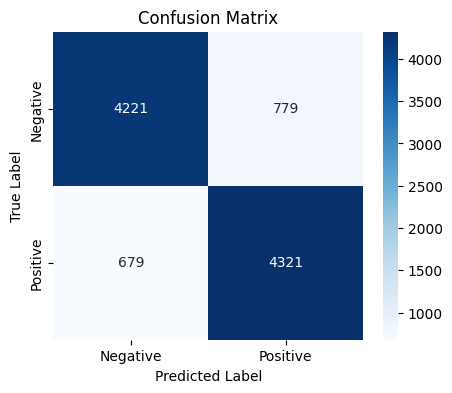

In [5]:
# Initialize the Multinomial Naïve Bayes classifier
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Word Cloud Visualization

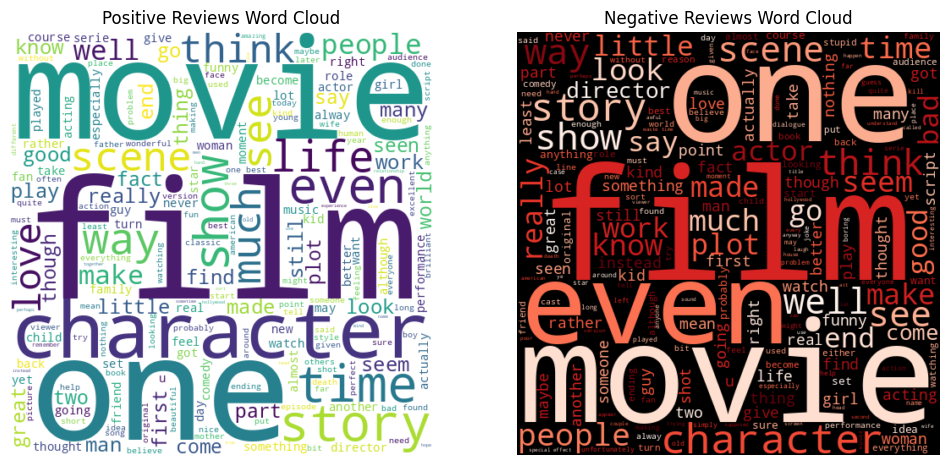

In [6]:
from wordcloud import WordCloud

# Separate positive and negative reviews
positive_reviews = df[df['sentiment'] == 'positive']['cleaned_review']
negative_reviews = df[df['sentiment'] == 'negative']['cleaned_review']

# Generate Word Clouds
plt.figure(figsize=(12, 6))

# Positive Word Cloud
plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=500, height=500, background_color='white').generate(' '.join(positive_reviews))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews Word Cloud")

# Negative Word Cloud
plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=500, height=500, background_color='black', colormap='Reds').generate(' '.join(negative_reviews))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews Word Cloud")

plt.show()

# Top word analysis

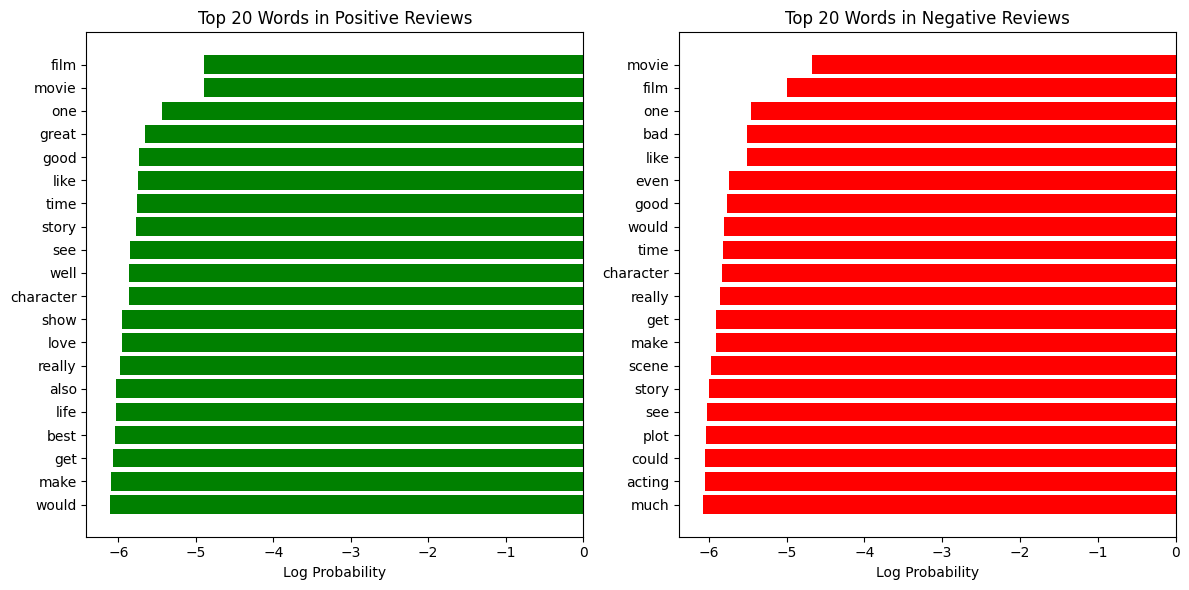

In [8]:
# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Get log probabilities for each word
class_probabilities = nb_classifier.feature_log_prob_

# Get top words for positive and negative reviews
top_positive_words = np.argsort(class_probabilities[1])[-20:]  # Top 20 words for positive class
top_negative_words = np.argsort(class_probabilities[0])[-20:]  # Top 20 words for negative class

# Plot top words
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(range(20), class_probabilities[1][top_positive_words], color='green')
plt.yticks(range(20), [feature_names[i] for i in top_positive_words])
plt.xlabel("Log Probability")
plt.title("Top 20 Words in Positive Reviews")

plt.subplot(1, 2, 2)
plt.barh(range(20), class_probabilities[0][top_negative_words], color='red')
plt.yticks(range(20), [feature_names[i] for i in top_negative_words])
plt.xlabel("Log Probability")
plt.title("Top 20 Words in Negative Reviews")

plt.tight_layout()
plt.show()